
# NRZ-I Encoding and Decoding Python Impelementation

In this practical, at first we saw the graph of input set, then observe both encoded and decoded graph

In [35]:
import numpy as np
import matplotlib.pyplot as plt

In [36]:
# !pip install numpy

In [37]:
# !pip install matplotlib

- numpy is useful for handling data structures and mathematical functions.

- matplotlib.pyplot is used for creating visual plots and graphs to represent data.

- for installing numpy and matplotlib, we can just run the commented 2 line code without commenting

In [38]:
input_binary_string = '10111001'
#  input_binary_string = input("Enter a binary string (e.g., 10111001): ")

Here I just took the input.

In [39]:
input_binary_array_list = [int(char) for char in input_binary_string]
print(input_binary_array_list)

[1, 0, 1, 1, 1, 0, 0, 1]


At first, I compress the string to a list of integers and then normally print the output list.

In [40]:
def graph_design(signal):
    time=range(len(signal)+1)
    signal=signal+[signal[-1]]
    plt.figure(figsize=(8,4))
    plt.step(time, signal,where='post',label="NRZ-I Signal",color='red')
    plt.xlabel('Time')
    plt.ylabel('Voltage Level')
    plt.title('Input GRAPH')
    # plt.yticks([0, 1])
    plt.grid(True)
    plt.show()

This code mainly generate the graph, now I will just call the function referencing the input signal.

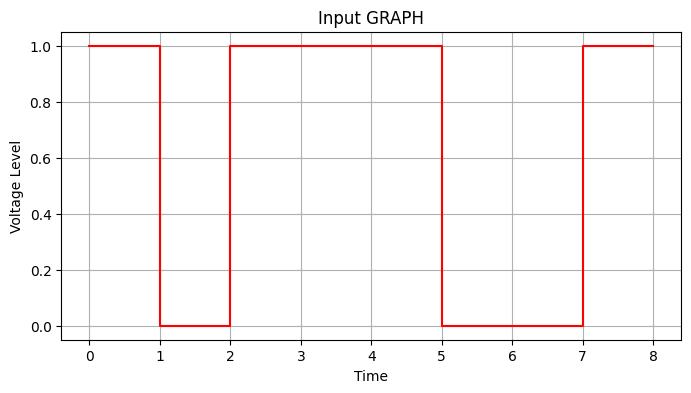

In [41]:
graph_design(input_binary_array_list)

And this complete the graph of input set.

# Introduction to NRZ-I Encoding

NRZ-I (Non-Return-to-Zero Inverted) encoding is a method used in digital communication systems where a binary '1' causes a transition in the signal level, and a binary '0' means no transition or keep same the previous signal level. This encoding scheme is important because it helps in reducing signal distortion and maintaining synchronization in the communication channel.

### NRZ-I Encoding Rule:

- A '1' bit causes the signal to flip or toogle from its previous state (if it was 0, it becomes 1, and if it was 1, it becomes 0).
- A '0' bit does not change the previous signal level.

In this experiment, we will implement NRZ-I encoding and decoding using Python and observe how the signal is modified through the process.

In [42]:
def NRZ_I_encode(string):
    encoded_signal=''
    previous_state = '1'
    for bit in string:
        if bit == '1':
            if previous_state == '0':
                previous_state = '1'
            else:
                previous_state = '0'
        # If the bit is '0', no change in the signal state
        encoded_signal+=previous_state
    return encoded_signal


There are two types.

- Initial Low: which means the previous bit of the initial bit is assumed to be zero(0) or low
- initial High: which means the previous bit of the initial bit is assumed to be one(1) or high

In [43]:
NRZ_I_encoded_signal_string = NRZ_I_encode(input_binary_string)
print(f"NRZ_I_Encoded_Signal: {NRZ_I_encoded_signal_string}")


NRZ_I_Encoded_Signal: 00101110


In [44]:
NRZ_I_encoded_signal_array_list = [int(char) for char in NRZ_I_encoded_signal_string]
print(NRZ_I_encoded_signal_array_list)

[0, 0, 1, 0, 1, 1, 1, 0]


In [45]:
def NRZ_I_encoded_graph_design(signal):
    time=range(len(signal)+1)
    signal=signal+[signal[-1]]
    plt.figure(figsize=(8,4))
    plt.step(time, signal,where='post',label="NRZ-I Signal",color='purple')
    plt.xlabel('Time')
    plt.ylabel('Voltage Level')
    plt.title(f'NRZ-I Encoding : {input_binary_string}')
    # plt.yticks([0, 1])
    plt.grid(True)
    plt.show()


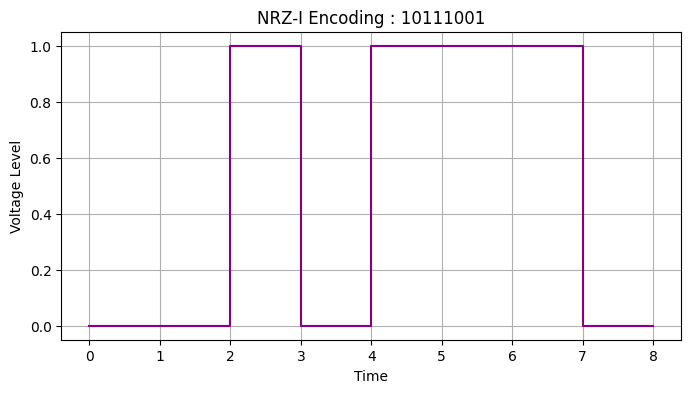

In [46]:
NRZ_I_encoded_graph_design(NRZ_I_encoded_signal_array_list)

# Introduction to NRZ-I Decoding

NRZ-I (Non-Return-to-Zero Inverted) encoding is a method used in digital communication systems where a binary '1' causes a transition in the signal level, and a binary '0' means no transition or keeps the previous signal level unchanged. This encoding scheme is important because it helps in reducing signal distortion and maintaining synchronization in the communication channel.

### NRZ-I Decoding Rule:

- If a transition occurs, decode it as ‘1’.
- If no transition occurs, decode it as ‘0’.

In this experiment, we will implement NRZ-I encoding and decoding using Python and observe how the signal is modified through the process.

In [47]:
def NRZ_I_decode(encoded_signal):
    decoded_data = '1'  
    # The first bit is assumed to be 1 (since initial level is arbitrary)
    # decoded_data = '0'
    
    for i in range(1, len(encoded_signal)):
        if encoded_signal[i] == encoded_signal[i - 1]:
            decoded_data += '0'  # No transition means 0
        else:
            decoded_data += '1'  # Transition means 1

    return decoded_data

In [48]:
# print("Encoded Signal: {NRZ_I_encoded_signal_string}")
print(f"Encoded Signal: {NRZ_I_encoded_signal_string}")
decoded_signal = NRZ_I_decode(NRZ_I_encoded_signal_string)
print("Decoded Signal: "+decoded_signal)
# print(f"Decoded Signal: {decoded_signal}")

Encoded Signal: 00101110
Decoded Signal: 10111001


In [49]:
decoded_signal_list = [int(char) for char in decoded_signal]
print(decoded_signal_list)

[1, 0, 1, 1, 1, 0, 0, 1]


In [50]:
def NRZ_I_decoded_graph_design(signal):
    time=range(len(signal)+1)
    signal=signal+[signal[-1]]
    plt.figure(figsize=(10, 5))
    plt.step(time, signal, where='post', label="NRZ-I Signal", color='brown')
    plt.xlabel("Time")
    plt.ylabel("Signal Level")
    plt.title(f'NRZ-I Decoding : {input_binary_string}')
    plt.grid(True)
    plt.show()

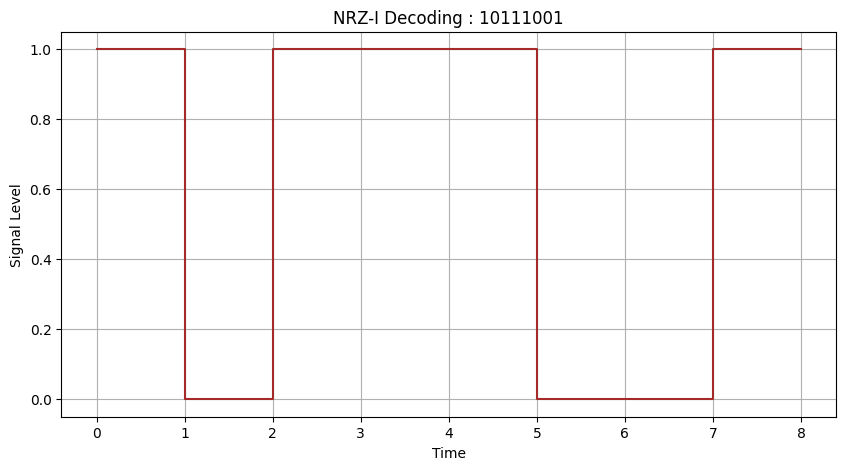

In [51]:
NRZ_I_decoded_graph_design(decoded_signal_list)